Complete the exercises below For **Assignment #11**.

For this assignment we'll use the [California Housing Data](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

This data is available in the [Scikit-Learn](https://scikit-learn.org/stable/index.html) Python module.

To retrieve the data,
1. open a new Python notebook with the `data730` kernel, and,
2. run the following code.

```python
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

(
    california_housing.data
    .assign(MedianHouseValue=california_housing.target)
    .to_csv('california-housing.csv', index=False)
)
```

This will produce a new file called `california-housing.csv` that we'll import in this notebook.

Back in the Python notebook, you can use the following snippet to get a description of the dataset.

```python
print(california_housing.DESCR)
```


In [1]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

(
    california_housing.data
    .assign(MedianHouseValue=california_housing.target)
    .to_csv('california-housing.csv', index=False)
)

In [2]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Load the `tidymodels` package.

In [2]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



Run the following cell to read in our data.

In [1]:
housing = readr::read_csv('california-housing.csv', col_types = readr::cols())

housing |> head()

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.3252,41,6.984127,1.0238095,322,2.555556,37.88,-122.23,4.526
8.3014,21,6.238137,0.9718805,2401,2.109842,37.86,-122.22,3.585
7.2574,52,8.288136,1.0734463,496,2.802260,37.85,-122.24,3.521
5.6431,52,5.817352,1.0730594,558,2.547945,37.85,-122.25,3.413
3.8462,52,6.281853,1.0810811,565,2.181467,37.85,-122.25,3.422
4.0368,52,4.761658,1.1036269,413,2.139896,37.85,-122.25,2.697


Let's build a random forest model to predict `MedianHouseValue`.

1. Create your model, set the engine to `ranger` with `importance = 'impurity'` and the mode as `regression`.
2. Fit the model using `MedianHouseValue` as the response variable and all other columns as predictors.

In [7]:
# Load necessary libraries
library(tidymodels)
library(readr)

# Read in the data
housing <- read_csv('california-housing.csv', col_types = cols())

# Print the first few rows of the data
print(head(housing))

# Define the random forest model and set the engine to ranger with importance set to impurity
rf_model <- rand_forest(mode = 'regression') %>%
  set_engine("ranger", importance = 'impurity')

# Define the recipe
housing_recipe <- recipe(MedianHouseValue ~ ., data = housing)

# Create the workflow
rf_workflow <- workflow() %>%
  add_model(rf_model) %>%
  add_recipe(housing_recipe)

# Fit the model
rf_fit <- fit(rf_workflow, data = housing)

# Print the model fit
print(rf_fit)


# A tibble: 6 × 9
  MedInc HouseAge AveRooms AveBedrms Population AveOccup Latitude Longitude
   <dbl>    <dbl>    <dbl>     <dbl>      <dbl>    <dbl>    <dbl>     <dbl>
1   8.33       41     6.98     1.02         322     2.56     37.9     -122.
2   8.30       21     6.24     0.972       2401     2.11     37.9     -122.
3   7.26       52     8.29     1.07         496     2.80     37.8     -122.
4   5.64       52     5.82     1.07         558     2.55     37.8     -122.
5   3.85       52     6.28     1.08         565     2.18     37.8     -122.
6   4.04       52     4.76     1.10         413     2.14     37.8     -122.
# ℹ 1 more variable: MedianHouseValue <dbl>
══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
Ranger result

Call:
 ranger

❓ What is the OOB error for this model?

**Answer:**

0.2332761

Plot the feature importances using the `vip` package. Remember that you can use the `extract_fit_engine` function to get the `ranger` model object to send to the `vip` function.


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




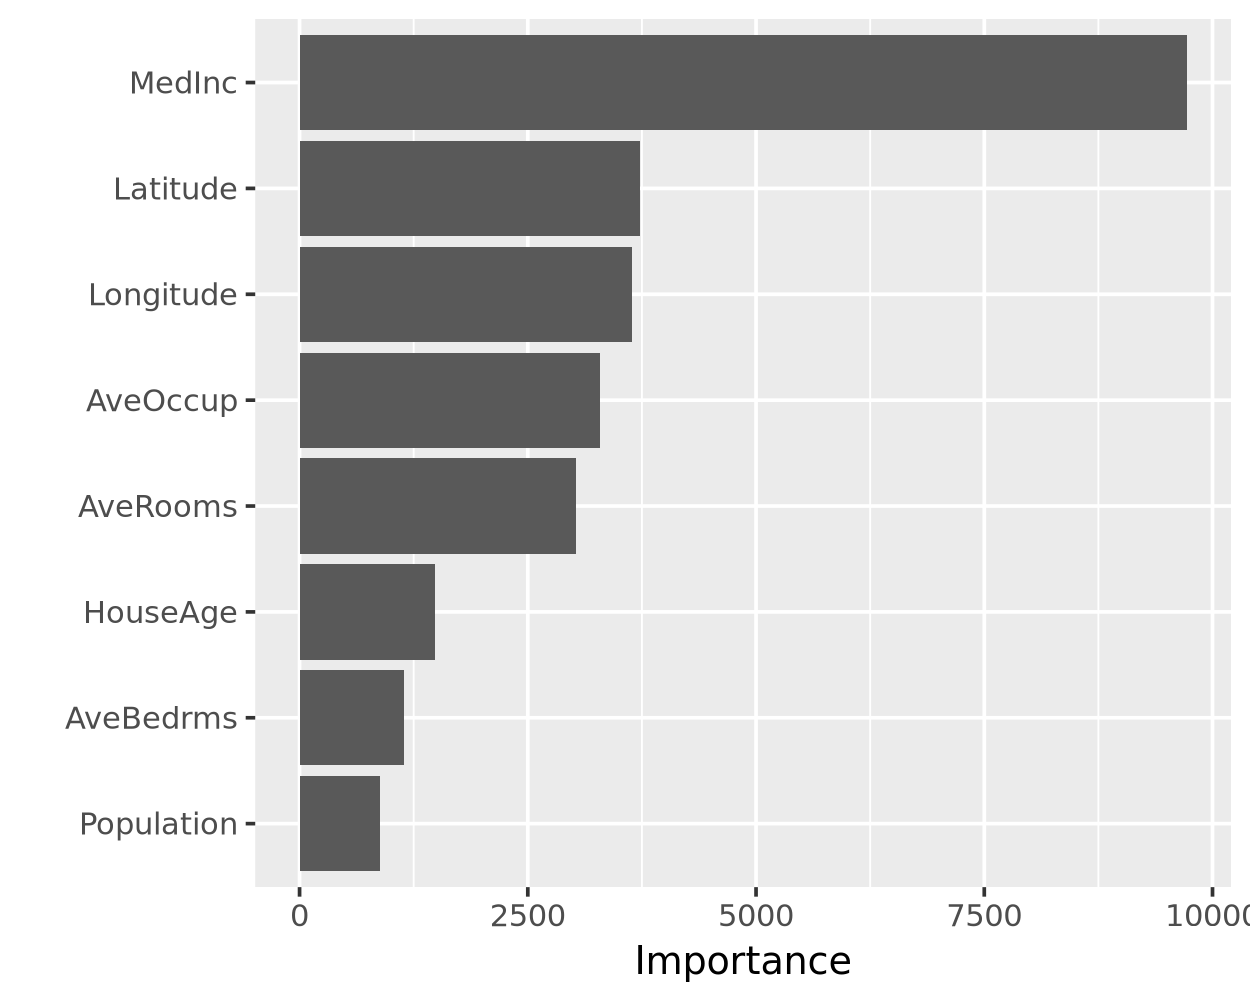

In [10]:
# Load necessary libraries
library(tidymodels)
library(readr)
library(vip)

# Read in the data
housing <- read_csv('california-housing.csv', col_types = cols())

# Define the random forest model and set the engine to ranger with importance set to impurity
rf_model <- rand_forest(mode = 'regression') %>%
  set_engine("ranger", importance = 'impurity')

# Define the recipe
housing_recipe <- recipe(MedianHouseValue ~ ., data = housing)

# Create the workflow
rf_workflow <- workflow() %>%
  add_model(rf_model) %>%
  add_recipe(housing_recipe)

# Fit the model
rf_fit <- fit(rf_workflow, data = housing)

# Extract the ranger model
ranger_model <- rf_fit %>% 
  extract_fit_engine()

# Plot the feature importances using the vip package
vip_plot <- vip(ranger_model)

# Print the plot
print(vip_plot)


It looks like `Latitude` and `Longitude` are important for precicting home value. Let's explore those variables.

Install the `mapdata` package into your `data730` environment.

1. Open a Terminal, and,
2. Run the following command:

```bash
conda install -c conda-forge -n data730 r-mapdata
```

Load the `mapdata` package.

In [12]:
# Install the mapdata package
install.packages("mapdata")

# Load the mapdata package
library(mapdata)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



The following code will generate a map of California. Adapt this code to plot `Latitude` and `Longitude` from the `housing` dataset, color points by the `MedianHouseValue`. [Here is an example for reference](https://raw.githubusercontent.com/UNC-DATA-730/a10/main/example.png).


```r
california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +
    coord_quickmap() +
    theme_void()
```

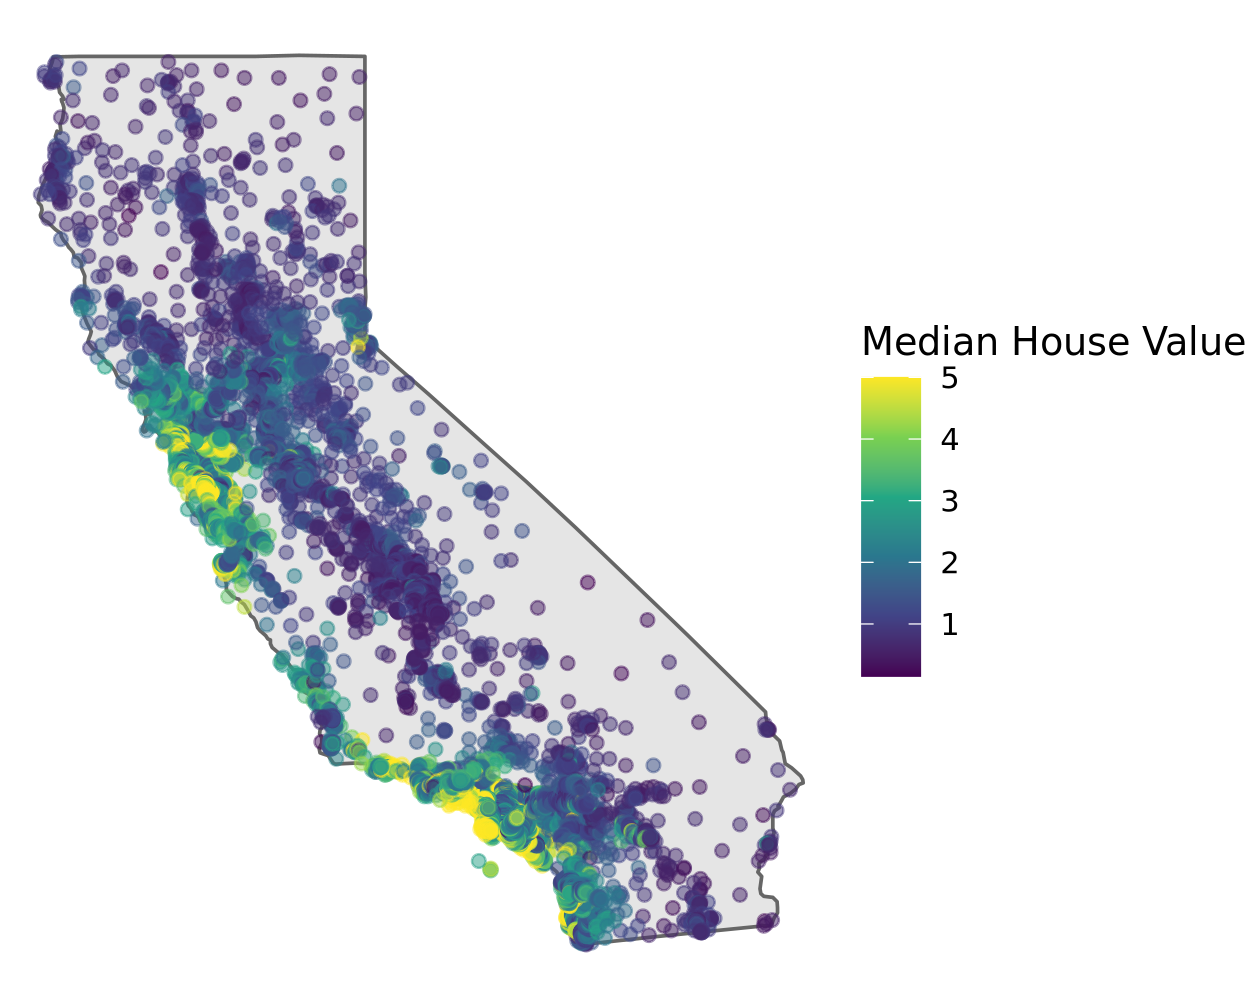

In [14]:
# Load necessary libraries
library(tidymodels)
library(readr)
library(ggplot2)
library(dplyr)
library(mapdata)

# Read in the data
housing <- read_csv('california-housing.csv', col_types = cols())

# Get the map data for California
california <- map_data("state") %>%
  filter(region == 'california')

# Generate the plot
ggplot(data = california) + 
  geom_polygon(aes(x = long, y = lat, group = group), fill = "grey90", color = "grey40") +
  geom_point(data = housing, aes(x = Longitude, y = Latitude, color = MedianHouseValue), alpha = 0.5) +
  scale_color_viridis_c(option = "viridis") +
  coord_quickmap() +
  theme_void() +
  labs(color = "Median House Value")
